## Installation Requirements

Before running this notebook, ensure the following packages are installed by running these commands in your command line interface (CLI):

```bash
pip install --upgrade pip setuptools wheel
pip install --upgrade pip

pip install deepface
pip install tf-keras

pip install matplotlib
```

In [35]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import os
import cv2

In [43]:
# Define the image path and filename
img_directory = "chaewon-test"
img_filename = "covered.jpg"

# Combine the directory with the base path
full_img_path = os.path.join("face-db", img_directory, img_filename)

1

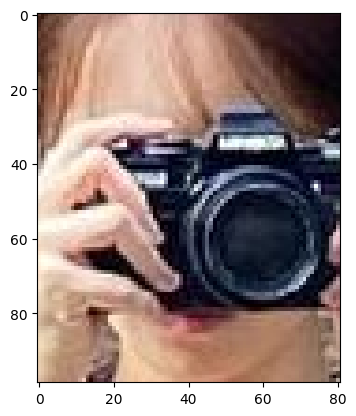

In [44]:
backends = [
    "opencv",
    "ssd",
    "dlib",
    "mtcnn",
    "fastmtcnn",
    "retinaface",
    "mediapipe",
    "yolov8",
    "yunet",
    "centerface",
]

faces = DeepFace.extract_faces(
    img_path=full_img_path,
    detector_backend="retinaface",
)

for face in faces:
    plt.imshow(face["face"])

len(faces)

TO-DO:
This returns ALL faces in the photo. I need to make sure I get the face of the specific person I want. To do this, I must use the verify function of the deepface library to check against each face.

In [38]:
# Load the image from the predefined path
img = cv2.imread(full_img_path)
if img is None:
    print("Failed to load image.")
    # Exit or handle error appropriately
else:
    # Extract facial area data from deepface results
    facial_area = faces[0]["facial_area"]
    x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]

    # Crop the image using the facial area coordinates
    cropped_img = img[y : y + h, x : x + w]
    if cropped_img.size == 0:
        print("Error: Cropped image is empty.")
    else:
        # Set up the directory and filename for the cropped image
        cropped_img_filename = "cropped_" + img_filename
        output_directory = os.path.join("output", img_directory)
        full_cropped_img_path = os.path.join(output_directory, cropped_img_filename)

        # Ensure the output directory exists before saving
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        # Save the cropped image
        success = cv2.imwrite(full_cropped_img_path, cropped_img)
        if success:
            print("Image successfully saved.")
        else:
            print("Failed to save image.")

Image successfully saved.
